In [1]:
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

plt.style.use('ggplot')

palette_standard = {
    'white': 'white',
    'black': 'black',
    'green': 'green',
    'red':   'red',
    'purple': 'purple'
}
palette_gruv = {
    'white': '#f9f5d7',
    'black': '#3c3836',
    'green': '#98971a',
    'red':   '#cc241d',
    'purple': '#8f3f71',
    'blue': '#076678'
}
palette = palette_gruv

In [2]:
pollution2018 = pd.read_csv('../csv/pollution_detection/ds459_qaria_datoariagiornostazione_year-2018.csv', sep=';')
pollution2017 = pd.read_csv('../csv/pollution_detection/ds460_qaria_datoariagiornostazione_year-2017.csv', sep=';')
pollution2016 = pd.read_csv('../csv/pollution_detection/ds461_qaria_datoariagiornostazione_year-2016.csv', sep=';')
pollution2015 = pd.read_csv('../csv/pollution_detection/ds462_qaria_datoariagiornostazione_year-2015.csv', sep=';')
pollution2014 = pd.read_csv('../csv/pollution_detection/ds463_qaria_datoariagiornostazione_year-2014.csv', sep=';')

In [3]:
def plot(dataset, substance, max_daily):
    ds = dataset[dataset['inquinante']==substance].dropna()[['data', 'valore']]
    ds = ds.groupby(by='data').max()
    x = ds.index.map(lambda i: i[-5:])
    y = ds['valore']
    year = ds.index[0][:4]
    maxY = [max_daily] * x.size
    warY = [max_daily+max_daily] *x.size
    
    fig = plt.figure()
    ax = plt.axes()
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_color(palette['white'])
    ax.set_facecolor(palette["white"])
    plt.grid(False)
    plt.xticks(range(0, x.size, 30))
    plt.plot(x,y, color='k', linewidth=0.2)
    
    #plt.plot(x, maxY)
    fig.patch.set_facecolor(palette['white'])
    plt.title(substance + " " + year)
    plt.fill_between(x,y,maxY, where=y<maxY, alpha=.3, color=palette['green'])
    plt.fill_between(x,y,maxY, where=(y>maxY), alpha=.3, color=palette['red'])
    plt.fill_between(x,y,maxY, where=y>=warY, alpha=1, color=palette['purple'])
    #plt.savefig('x')
    plt.show()

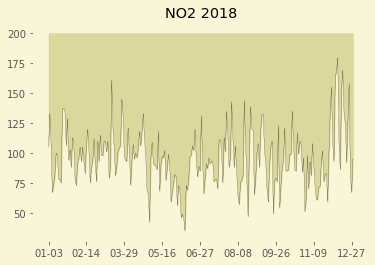

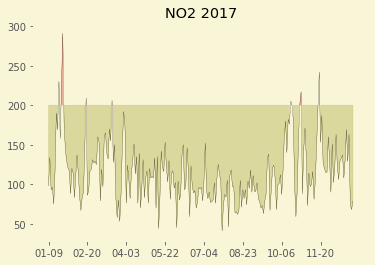

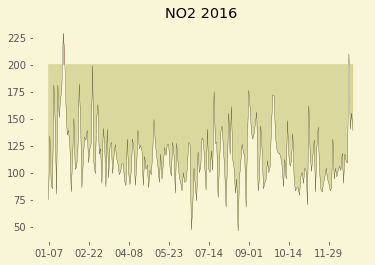

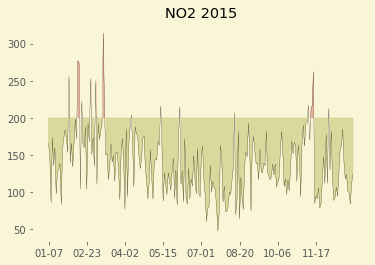

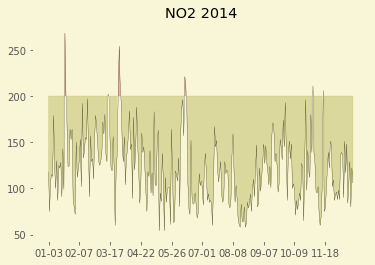

In [4]:
plot(pollution2018, 'NO2', 200) # one hour average
plot(pollution2017, 'NO2', 200)
plot(pollution2016, 'NO2', 200)
plot(pollution2015, 'NO2', 200)
plot(pollution2014, 'NO2', 200)

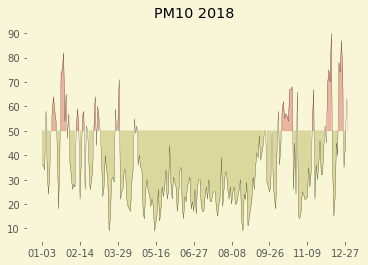

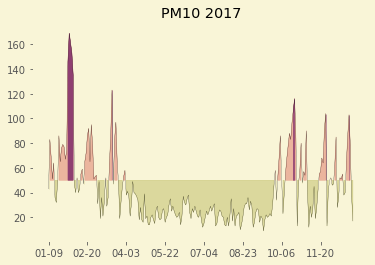

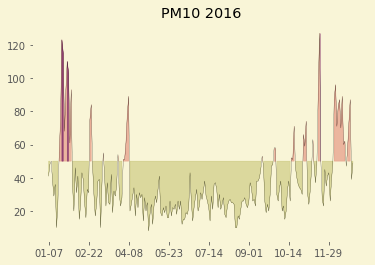

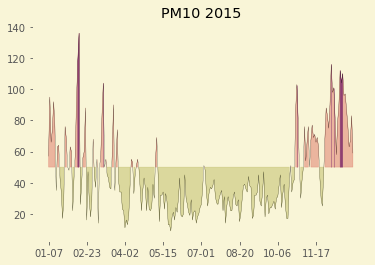

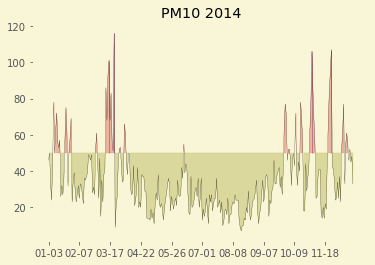

In [5]:
plot(pollution2018, 'PM10', 50)
plot(pollution2017, 'PM10', 50)
plot(pollution2016, 'PM10', 50)
plot(pollution2015, 'PM10', 50)
plot(pollution2014, 'PM10', 50)

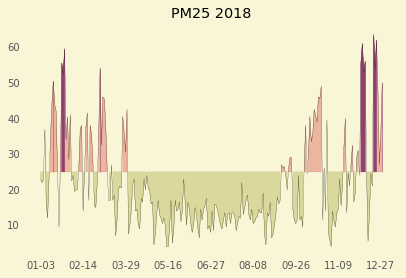

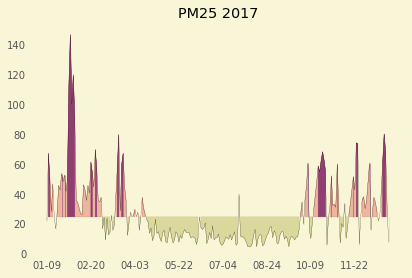

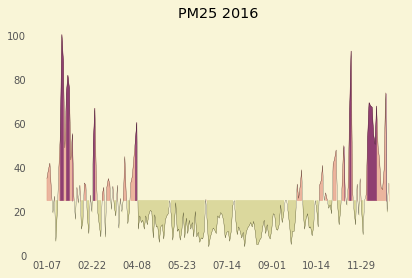

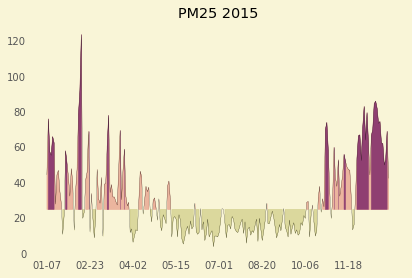

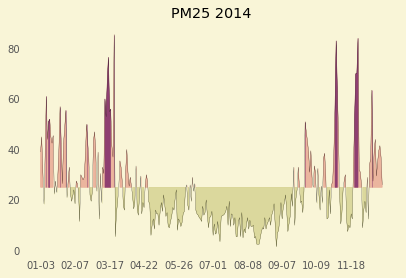

In [269]:
plot(pollution2018, 'PM25', 25) #year limit
plot(pollution2017, 'PM25', 25)
plot(pollution2016, 'PM25', 25)
plot(pollution2015, 'PM25', 25)
plot(pollution2014, 'PM25', 25)

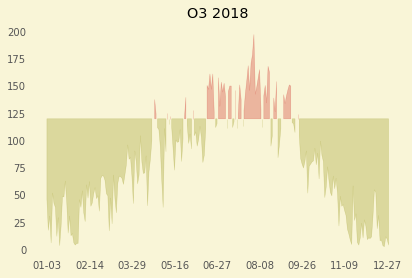

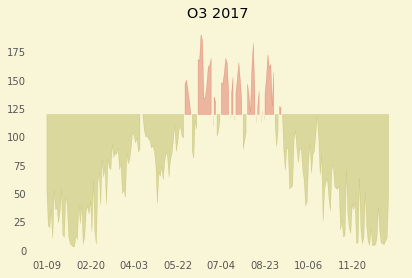

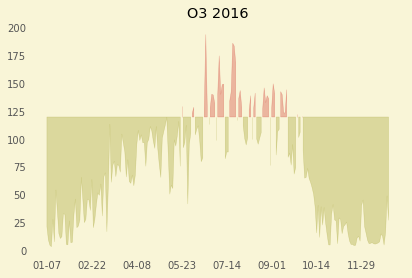

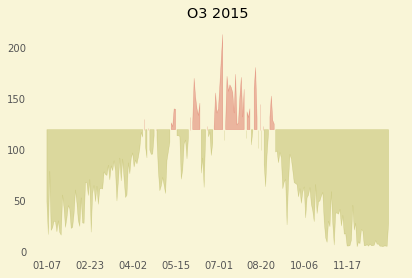

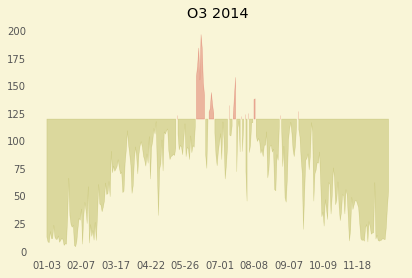

In [265]:
plot(pollution2018, 'O3', 120) #8hour mean
plot(pollution2017, 'O3', 120)
plot(pollution2016, 'O3', 120)
plot(pollution2015, 'O3', 120)
plot(pollution2014, 'O3', 120)

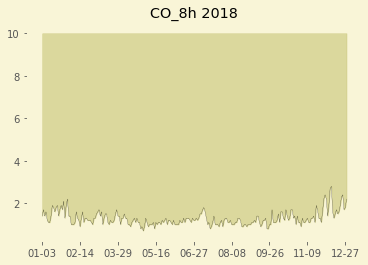

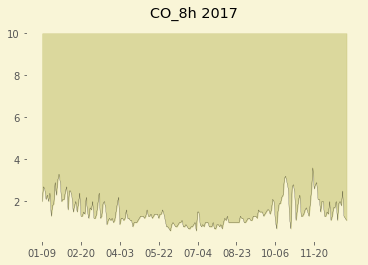

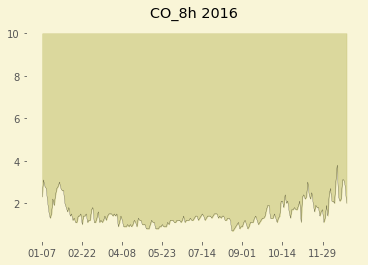

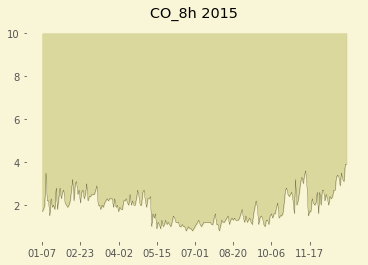

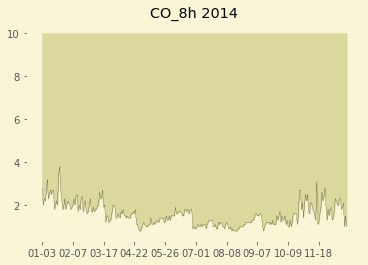

In [6]:
plot(pollution2018, 'CO_8h', 10) #8h
plot(pollution2017, 'CO_8h', 10)
plot(pollution2016, 'CO_8h', 10)
plot(pollution2015, 'CO_8h', 10)
plot(pollution2014, 'CO_8h', 10)

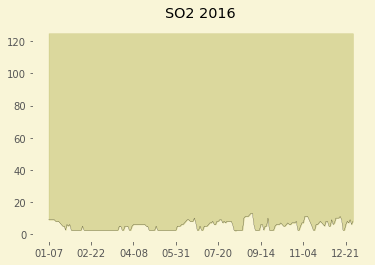

In [8]:
plot(pollution2016, 'SO2', 125) #one hour limit

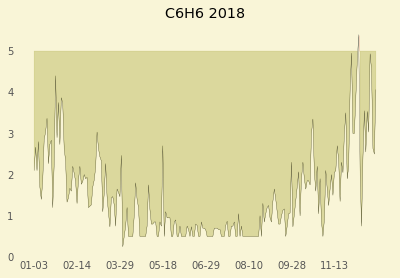

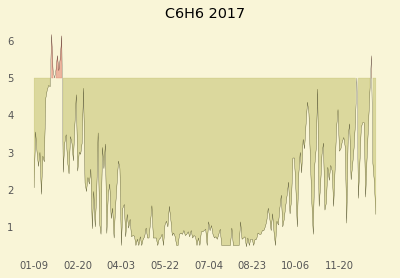

In [280]:
plot(pollution2018, 'C6H6', 5)
plot(pollution2017, 'C6H6', 5)

In [282]:
pollution2018

,stazione_id,data,inquinante,valore
0,1,2018-01-03,NO2,NaN
1,3,2018-01-03,NO2,103.0
2,3,2018-01-03,CO_8h,1.4
3,4,2018-01-03,NO2,105.0
4,4,2018-01-03,CO_8h,1.1
...,...,...,...,...
6076,7,2018-12-28,NO2,60.0
6077,7,2018-12-28,O3,4.0
6078,8,2018-12-28,NO2,NaN
6079,8,2018-12-28,CO_8h,NaN
